<a href="https://colab.research.google.com/github/mtsilimos/Codesnippets_Sentence-Embeddings-for-the-Classification-of-Explicit-Fine-grained-Discourse-Relations/blob/main/bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/finalcorpus.csv', ';', encoding= 'unicode_escape')

<ipython-input-2-d19ce2d20660>:3: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('/content/drive/My Drive/finalcorpus.csv', ';', encoding= 'unicode_escape')


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df['text'],df['label'], test_size = 0.20, random_state = 42)

In [5]:

pip install tensorflow-text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 22.4 MB/s eta 0:00:00


In [6]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import pandas as pd

In [7]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")

In [8]:
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [9]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

In [10]:
l = tf.keras.layers.Dense(20, activation = 'relu')(outputs['pooled_output'])
l = tf.keras.layers.Dense(6,activation='relu')(l)
l = tf.keras.layers.Dense(4,activation='relu')(l)
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_type_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_word_ids': (None,                                            
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             }                                                                

In [12]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy')]

model.compile(optimizer='adam',
 loss='binary_crossentropy',
 metrics=METRICS)

In [13]:
history = model.fit(X_train, y_train,  shuffle= True, epochs=10 ,batch_size= 64, validation_data=(X_test, y_test))

Epoch 1/10
25/25 [==============================] - 35s 885ms/step - loss: 0.6843 - accuracy: 0.5331 - val_loss: 0.6678 - val_accuracy: 0.6250
Epoch 2/10
25/25 [==============================] - 22s 881ms/step - loss: 0.6478 - accuracy: 0.6650 - val_loss: 0.6085 - val_accuracy: 0.6900
Epoch 3/10
25/25 [==============================] - 22s 908ms/step - loss: 0.6211 - accuracy: 0.6694 - val_loss: 0.5849 - val_accuracy: 0.7025
Epoch 4/10
25/25 [==============================] - 23s 936ms/step - loss: 0.6034 - accuracy: 0.6869 - val_loss: 0.5733 - val_accuracy: 0.7200
Epoch 5/10
25/25 [==============================] - 24s 975ms/step - loss: 0.5874 - accuracy: 0.6975 - val_loss: 0.5505 - val_accuracy: 0.7325
Epoch 6/10
25/25 [==============================] - 23s 915ms/step - loss: 0.5646 - accuracy: 0.7306 - val_loss: 0.5311 - val_accuracy: 0.7475
Epoch 7/10
25/25 [==============================] - 22s 897ms/step - loss: 0.5496 - accuracy: 0.7425 - val_loss: 0.5129 - val_accuracy: 0.7725

In [14]:
model.evaluate(X_test, y_test)

13/13 [==============================] - 4s 323ms/step - loss: 0.4639 - accuracy: 0.8100


[0.4638919532299042, 0.8100000023841858]

In [15]:
model.evaluate(X_train, y_train)

50/50 [==============================] - 18s 359ms/step - loss: 0.4735 - accuracy: 0.8012


[0.4735187888145447, 0.8012499809265137]

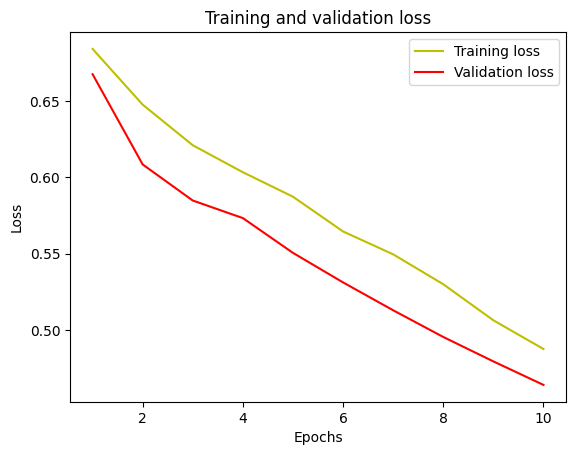

In [16]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

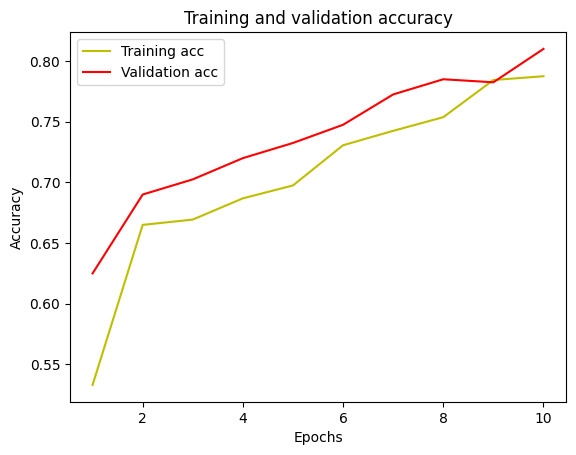

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()